# Optimal sensor placement via $QR$ pivoting

In [1]:
from os.path import join
import torch as pt
import pysensors as ps
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 180
output = "./output"

## $Re=170$

In [2]:
case = "pinnball_re170"
x = pt.load(join(output, case, "x.pt"))
y = pt.load(join(output, case, "y.pt"))
t = pt.load(join(output, case, "snapshot_times.pt"))
sig = pt.load(join(output, case, "svd_p_s.pt"))
p = pt.load(join(output, case, "p.pt"))

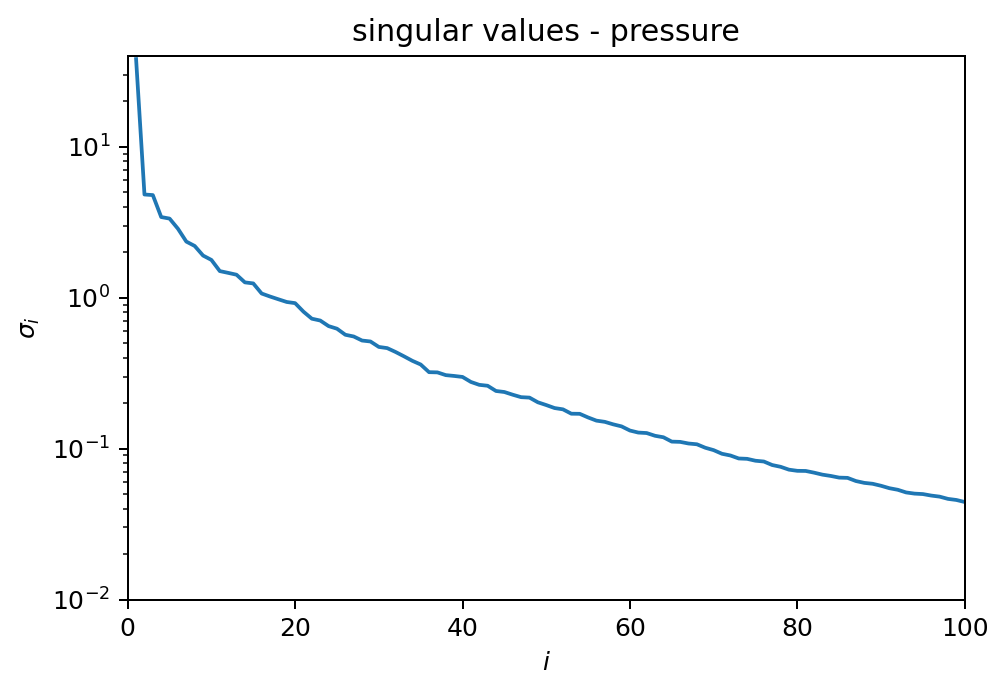

In [3]:
plt.plot(range(1, sig.shape[0] + 1), sig / sig.sum() * 100)
plt.xlabel(r"$i$")
plt.ylabel(r"$\sigma_i$")
plt.xlim(0, 100)
plt.ylim(1e-2)
plt.yscale("log")
plt.title("singular values - pressure")
plt.show()

In [4]:
t_train_start, t_train_end = 200, 700
i_train_start, i_train_end = (t-t_train_start).abs().argmin(), (t-t_train_end).abs().argmin()
i_train_end - i_train_start

tensor(1000)

In [5]:
model = ps.SSPOR(
    basis=ps.basis.SVD(n_basis_modes=20),
    n_sensors=20
)
model.fit(p[:, i_train_start:i_train_end].T.numpy())

SSPOR(basis=SVD(n_basis_modes=20), n_sensors=20, optimizer=QR())

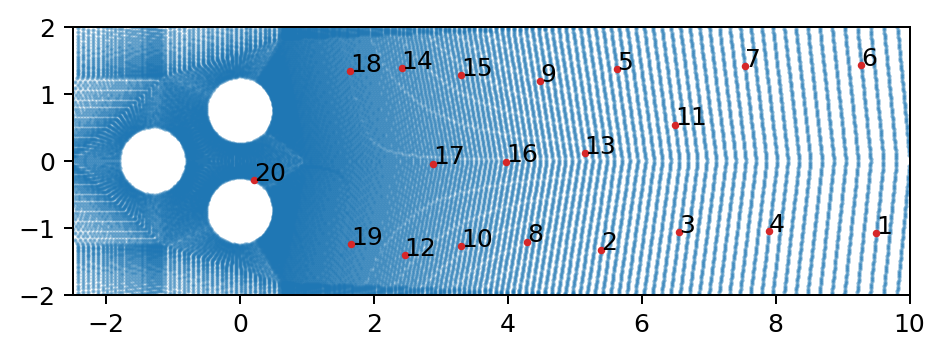

In [6]:
sensors = pt.from_numpy(model.get_selected_sensors()).type(pt.int64)
plt.scatter(x, y, c="C0", s=0.5, alpha=0.5)
plt.scatter(x[sensors], y[sensors], c="C3", s=4)
for i, pi in enumerate(sensors):
    plt.text(x[pi], y[pi], f"{i+1}")
plt.gca().set_aspect("equal")
plt.xlim(-2.5, 10)
plt.ylim(-2, 2)
plt.show()

In [7]:
reconstruction_error_train = model.reconstruction_error(p[:, i_train_start:i_train_end].T.numpy())
reconstruction_error_test = model.reconstruction_error(p[:, i_train_end:].T.numpy())

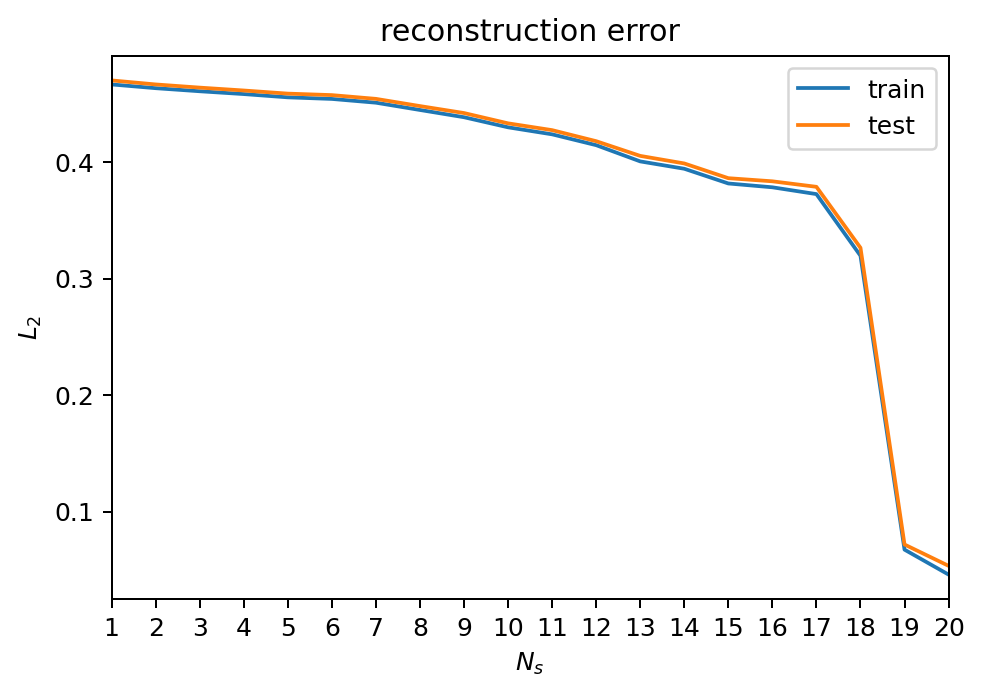

In [8]:
plt.plot(range(1, sensors.shape[0] + 1), reconstruction_error_train, label="train")
plt.plot(range(1, sensors.shape[0] + 1), reconstruction_error_test, label="test")
plt.xlabel(r"$N_s$")
plt.ylabel(r"$L_2$")
plt.xlim(1, sensors.shape[0])
plt.gca().set_xticks(range(1, sensors.shape[0] + 1))
plt.legend()
plt.title("reconstruction error")
plt.show()